In [57]:
#Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [58]:
#Reading the Data
data=pd.read_csv(r'D:\Data analytics\Datasets\Data-Collisions.csv')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
#Brief about what the data contains
data.head().T

,0,1,2,3,4
SEVERITYCODE,2,1,1,1,2
X,-122.323,-122.347,-122.335,-122.335,-122.306
Y,47.7031,47.6472,47.6079,47.6048,47.5457
OBJECTID,1,2,3,4,5
INCKEY,1307,52200,26700,1144,17700
COLDETKEY,1307,52200,26700,1144,17700
REPORTNO,3502005,2607959,1482393,3503937,1807429
STATUS,Matched,Matched,Matched,Matched,Matched
ADDRTYPE,Intersection,Block,Block,Block,Intersection
INTKEY,37475,NaN,NaN,NaN,34387


In [5]:
#All the colums present in this data
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
data.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [8]:
#Finding the total % of missing values
total = data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PEDROWNOTGRNT,190006,0.976026
EXCEPTRSNDESC,189035,0.971039
SPEEDING,185340,0.952058
INATTENTIONIND,164868,0.846897
INTKEY,129603,0.665747
EXCEPTRSNCODE,109862,0.564341
SDOTCOLNUM,79737,0.409595
JUNCTIONTYPE,6329,0.032511
Y,5334,0.027400
X,5334,0.027400


It is seen that seven colums have lots of missing values as the % ranges between 40-97%. It is definetly recommended to drop all those values.

In [4]:
data.drop(['PEDROWNOTGRNT','EXCEPTRSNDESC','SPEEDING','INATTENTIONIND','INTKEY','EXCEPTRSNCODE','SDOTCOLNUM','X','Y','LOCATION'],axis=1,inplace=True)
data.head()

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,1,1307,1307,3502005,Matched,Intersection,2,Injury Collision,Angles,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,10,Entering at angle,0,0,N
1,1,2,52200,52200,2607959,Matched,Block,1,Property Damage Only Collision,Sideswipe,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,0,0,N
2,1,3,26700,26700,1482393,Matched,Block,1,Property Damage Only Collision,Parked Car,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,32,One parked--one moving,0,0,N
3,1,4,1144,1144,3503937,Matched,Block,1,Property Damage Only Collision,Other,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,23,From same direction - all others,0,0,N
4,2,5,17700,17700,1807429,Matched,Intersection,2,Injury Collision,Angles,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,Entering at angle,0,0,N


## EDA

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

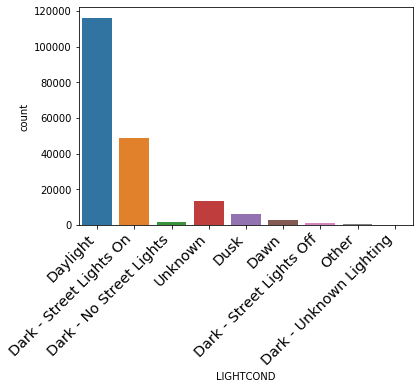

In [60]:
#Count of the accidents happened in different light conditions
sns.countplot(x='LIGHTCOND',data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

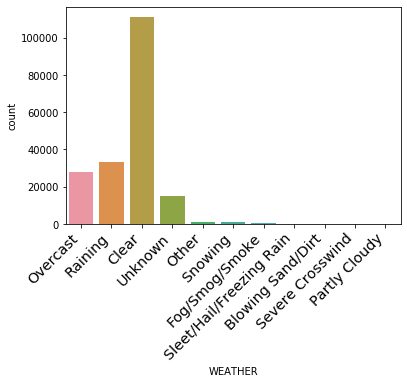

In [11]:
#Count of the accidents happened in different weather conditions
sns.countplot(x='WEATHER',data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

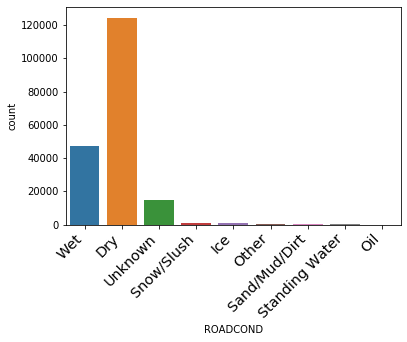

In [12]:
#Count of the accidents happened in different road conditions
sns.countplot(x='ROADCOND',data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

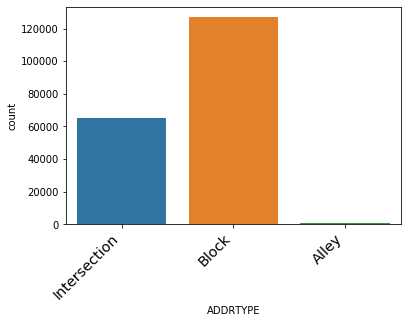

In [13]:
#Count of the accidents happened in different address types
sns.countplot(x='ADDRTYPE',data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

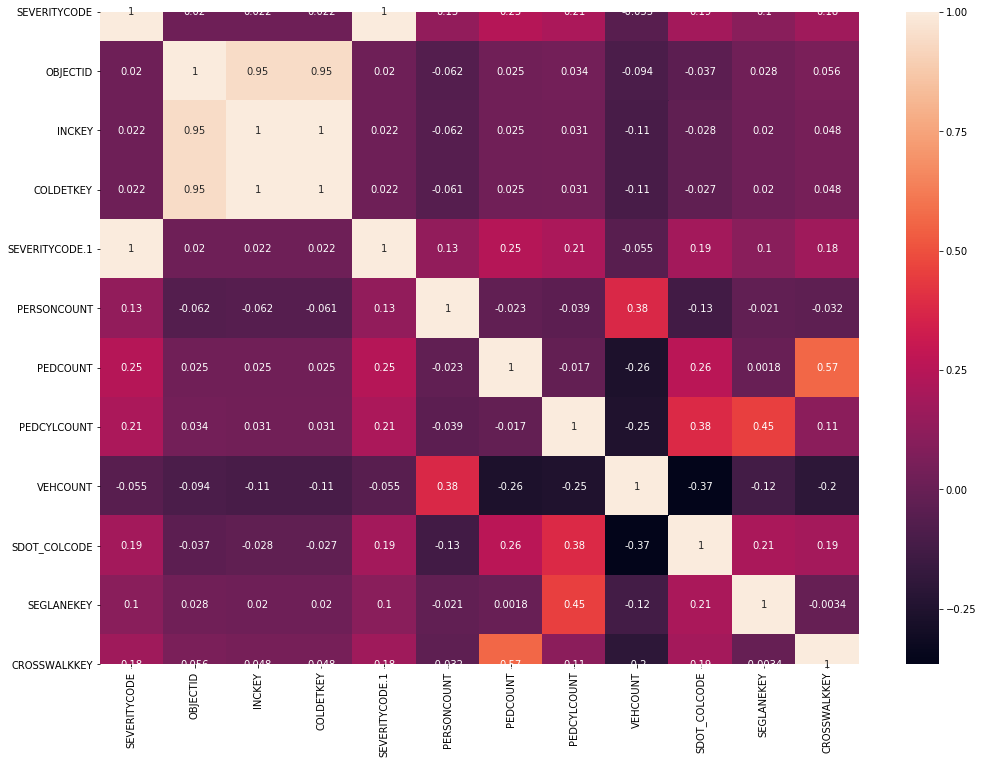

In [14]:
#Correlation heatmap
fig=plt.figure(figsize=(17,12))
c=data.corr()
sns.heatmap(c,annot=True)

In [10]:
#shuffling and creating a balanced dataset
data= data.sample(frac=1,random_state=0,replace=False)
data_scode2 = data.loc[data['SEVERITYCODE'] == 2]
data_scode1 = data.loc[data['SEVERITYCODE'] == 1].sample(n=48926,random_state=42)

#concatenating datasets to get balanced dataset
data_balanced = pd.concat([data_scode1,data_scode2])
data_balanced = data_balanced.sample(frac=1,random_state=0,replace=False)

In [11]:
#Defining X and Y
X=data[['ROADCOND','WEATHER','LIGHTCOND','ADDRTYPE','COLLISIONTYPE']]
y=data['SEVERITYCODE']

In [12]:
#Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Applying label encoder to each column with categorical data so that the model can run it.
label_encoder = LabelEncoder()
for col in X:
    if col in data.columns:
        i = data.columns.get_loc(col)
        data.iloc[:,i] = data.apply(lambda i:label_encoder.fit_transform(i.astype(str)), axis=0, result_type='expand')

        

## Fitting various ML models

In [22]:
#Logistic Regression algorithm
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions),'\n')
LR_acc=accuracy_score(y_test,predictions)
print('Accuracy:',LR_acc)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           1       0.70      0.99      0.82     27395
           2       0.31      0.01      0.02     11540

    accuracy                           0.70     38935
   macro avg       0.51      0.50      0.42     38935
weighted avg       0.59      0.70      0.58     38935

[[27156   239]
 [11431   109]] 

Accuracy: 0.7002696802362912


In [25]:
#Using SVC 
svc = SVC()
params = {'kernel':['linear','rbf'], 
          'random_state':[0]}
svc1 = GridSearchCV(svc, param_grid=params)
svc1.fit(X_train,y_train)
svc_predictions = svc1.predict(X_test)
print('Best Hyperparameter SVM : ',svc1.best_params_)

#Confusion Matrix
print(confusion_matrix(y_test,svc_predictions))
#Classification Report
print(classification_report(y_test,svc_predictions),'\n')
SVC_acc=accuracy_score(y_test,svc_predictions)
print('Accuracy:',SVC_acc)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better fo

Best Hyperparameter SVM :  {'kernel': 'rbf', 'random_state': 0}
[[26997   398]
 [ 9380  2160]]
              precision    recall  f1-score   support

           1       0.74      0.99      0.85     27395
           2       0.84      0.19      0.31     11540

    accuracy                           0.75     38935
   macro avg       0.79      0.59      0.58     38935
weighted avg       0.77      0.75      0.69     38935
 

Accuracy: 0.7488634904327726


In [23]:
#Naive bayes
NB= GaussianNB()
NB.fit(X_train,y_train)
NBpredictions = NB.predict(X_test)

#Confusion Matrix
print(confusion_matrix(y_test,NBpredictions))
#Classification Report
print(classification_report(y_test,NBpredictions),'\n')
NB_acc=accuracy_score(y_test,NBpredictions)
print('Accuracy:',NB_acc)

[[23319  4076]
 [ 8397  3143]]
              precision    recall  f1-score   support

           1       0.74      0.85      0.79     27395
           2       0.44      0.27      0.34     11540

    accuracy                           0.68     38935
   macro avg       0.59      0.56      0.56     38935
weighted avg       0.65      0.68      0.65     38935
 

Accuracy: 0.6796455631180172


In [24]:
#Decision Tree
dt = DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 
          'random_state':[0]}
dt1 = GridSearchCV(dt, param_grid=params)
dt1.fit(X_train,y_train)
dtpredictions = dt1.predict(X_test)
print('Best Hyperparameter DTC : ',dt1.best_params_)
#Confusion Matrix
print(confusion_matrix(y_test,dtpredictions))
#Classsification Report
print(classification_report(y_test,dtpredictions),'\n')
DT_acc=accuracy_score(y_test,dtpredictions)
print('Accuracy:',DT_acc)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyperparameter DTC :  {'criterion': 'entropy', 'random_state': 0}
[[26990   405]
 [ 9338  2202]]
              precision    recall  f1-score   support

           1       0.74      0.99      0.85     27395
           2       0.84      0.19      0.31     11540

    accuracy                           0.75     38935
   macro avg       0.79      0.59      0.58     38935
weighted avg       0.77      0.75      0.69     38935
 

Accuracy: 0.7497624245537434


# RESULTS


In [56]:
#Comparison of Different models used.
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes','SVC', 'Decision Tree'],
    'Score': [LR_acc,NB_acc,SVC_acc,DT_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,0.749762
2,SVC,0.748863
0,Logistic Regression,0.700270
1,Naive Bayes,0.679646


Here we Can see that Decision Tree and SVC models have performed the best.